# Bibliotecas necessárias

In [33]:
import numpy as np  # Biblioteca para manipulação numérica eficiente
import pandas as pd  # Biblioteca para manipulação de dados em formato de DataFrame
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
from sklearn.decomposition import PCA  # Importando a classe PCA (Análise de Componentes Principais) do scikit-learn
from sklearn.cluster import KMeans  # Importando a classe KMeans do scikit-learn para realizar clusterização K-Means
from sklearn.preprocessing import StandardScaler  # Importando a classe StandardScaler do scikit-learn para padronização de dados
from sklearn.cluster import AgglomerativeClustering  # Importando a classe AgglomerativeClustering do scikit-learn para realizar clustering aglomerativo
from tqdm import tqdm_notebook as tqdm  # Importa a função tqdm_notebook do módulo tqdm para exibir barras de progresso em Jupyter Notebook
import seaborn as sns  # Importa a biblioteca seaborn para visualização de dados estatísticos
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from googlesearch import search
from googletrans import Translator
import requests
import os
from sklearn.metrics import silhouette_score, davies_bouldin_score
#from googletrans import Translator
#from rpy2.robjects import pandas2ri
from transformers import BertTokenizer
from sklearn.metrics.pairwise import cosine_similarity

pip install google (Já instalado)

pip install googletrans==4.0.0-rc1 (Já instalado)

pip install rpy2 (Já instalado) 

pip install torch torchvision torchaudio (já instalado) 

# Importação dos dados 

In [2]:
# Importação dos dados
srag_tratado = pd.read_csv("srag_tratada.csv", low_memory = False)
dados = srag_tratado.copy().drop("ID", axis = 1)
print("Visualizando os primeiros registros dos dados:")
print(dados.head()) 

Visualizando os primeiros registros dos dados:
   CS_SEXO  NU_IDADE_N  CARDIOPATI_m  HEMATOLOGI_m  SIND_DOWN_m  HEPATICA_m  \
0        1    0.373737             0             0            0           0   
1        0    0.414141             0             0            0           0   
2        0    0.727273             1             0            0           0   
3        1    0.404040             0             0            0           0   
4        0    0.343434             1             0            0           0   

   ASMA_m  DIABETES_m  NEUROLOGIC_m  PNEUMOPATI_m  ...  IS_CAPITAL  UTI  \
0       0           0             0             0  ...           1    0   
1       0           0             0             0  ...           1    0   
2       0           0             1             0  ...           1    0   
3       0           1             0             0  ...           1    1   
4       0           0             0             0  ...           1    1   

   IS_DEATH  White  Black/B

In [3]:
srag_tratado.columns 

Index(['ID', 'CS_SEXO', 'NU_IDADE_N', 'CARDIOPATI_m', 'HEMATOLOGI_m',
       'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m',
       'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m', 'IS_CAPITAL',
       'UTI', 'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun'],
      dtype='object')

# Caso simples 

Sem o uso de semântica

# PCA (Caso simples)

PCA é uma técnica de redução de dimensionalidade que identifica os principais padrões nos dados, representando-os em um espaço de dimensão reduzida. Ele permite simplificar a interpretação dos dados e preservar as informações essenciais.


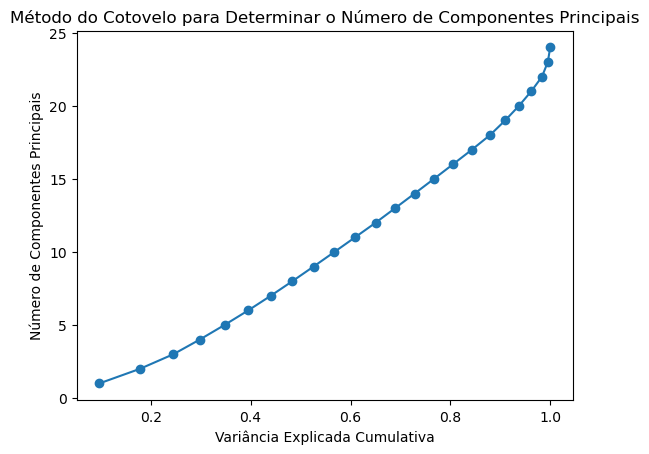

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supondo que você já tenha carregado seus dados e os armazenou em 'dados_dose_definitivo_01'

# Normalizando os dados (opcional, mas geralmente uma boa prática)
dados_norm = (srag_tratado - srag_tratado.mean()) / srag_tratado.std()

# Inicializando o objeto PCA sem especificar o número de componentes principais
pca = PCA()

# Aplicando a transformação PCA aos dados normalizados
pca.fit(dados_norm)

# Calcular a variância explicada cumulativa
var_exp_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância explicada cumulativa em relação ao número de componentes, invertendo os eixos
plt.plot(var_exp_cumulative, range(1, len(var_exp_cumulative) + 1), marker='o')
plt.ylabel('Número de Componentes Principais')
plt.xlabel('Variância Explicada Cumulativa')
plt.title('Método do Cotovelo para Determinar o Número de Componentes Principais')
plt.show()


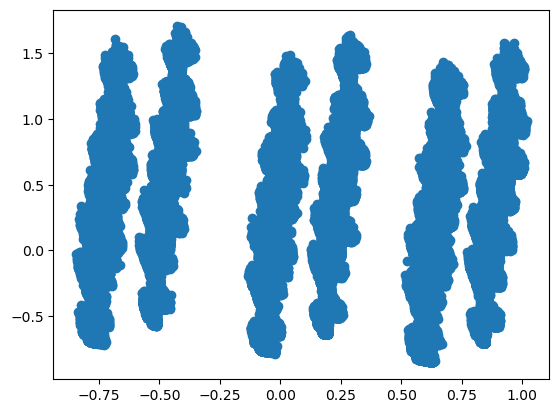

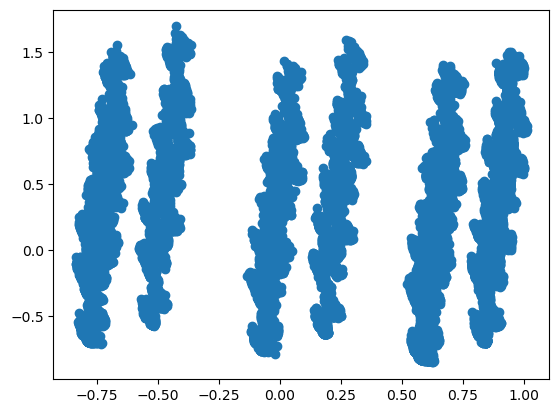

In [5]:
# Inicializando o objeto PCA com o número de componentes principais desejados = 2
pca = PCA(n_components=2)

# Aplicando a transformação PCA aos dados e armazenando o resultado em um DataFrame chamado dados_reduced
dados_reduced = pd.DataFrame(pca.fit_transform(dados))

# Verificando a forma (shape) dos dados originais
dados.shape

# Verificando a forma (shape) dos dados reduzidos após a aplicação do PCA
dados_reduced.shape

# Plotando um gráfico de dispersão dos dados reduzidos (apenas duas dimensões)
plt.scatter(dados_reduced[0], dados_reduced[1])

# Mostrando o gráfico
plt.show()

# Amostrando os dados reduzidos para 75000 instâncias, garantindo que a amostra seja a mesma para diferentes execuções (random_state=42)
dados_reduced_sample = dados_reduced.sample(75000, random_state=42)

# Plotando um gráfico de dispersão dos dados reduzidos amostrados
plt.scatter(dados_reduced_sample[0], dados_reduced_sample[1])

# Mostrando o gráfico
plt.show()


In [6]:
dados_reduced 

,0,1
0,0.180253,-0.592342
1,0.160373,-0.535167
2,-0.509394,0.591999
3,-0.414876,0.932765
4,-0.470223,1.166148
...,...,...
1671974,0.267653,0.997964
1671975,-0.516982,0.244740
1671976,-0.770558,-0.472479
1671977,-0.739486,-0.558375


# Técnicas para a formação de Clustering 



### KMeans

Um algoritmo de clustering que divide os dados em k clusters, onde cada observação pertence ao cluster com o centróide mais próximo.

### Gaussian Mixture Models (GMM):

Um modelo probabilístico que assume que os dados foram gerados a partir de uma mistura de várias distribuições gaussianas.

### Índice de Silhueta

O valor de silhueta é uma medida de quão similar um objeto é ao seu próprio cluster em comparação com outros clusters 

### BIC

   O método de BIC (Critério de Informação Bayesiano) é útil para modelos de Gaussian Mixture porque considera tanto o ajuste aos dados quanto a complexidade do modelo. Ele favorece modelos mais simples que ainda se ajustam bem aos dados, ajudando na escolha do número ideal de componentes gaussianos para uma melhor interpretação e generalização dos clusters.
   


C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\c

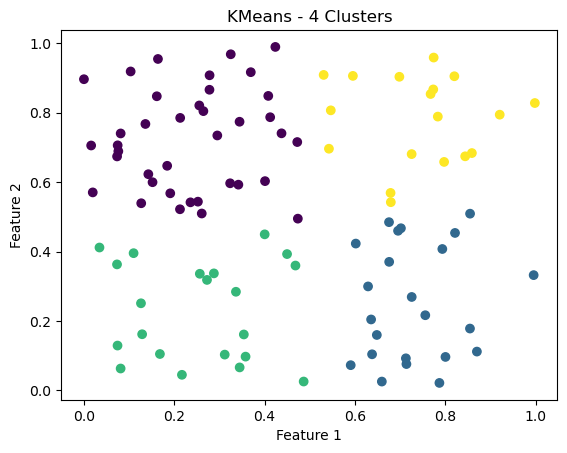

C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


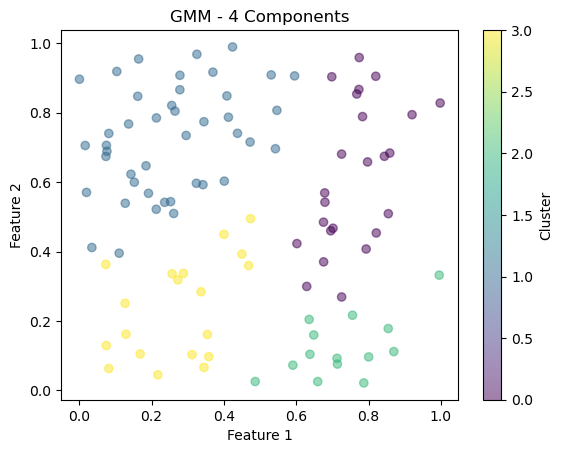

C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


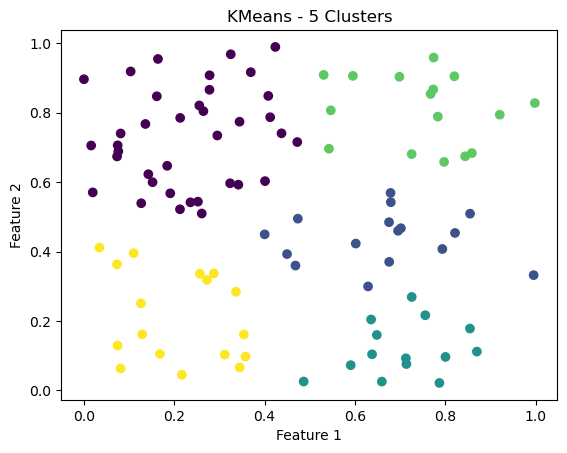

C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


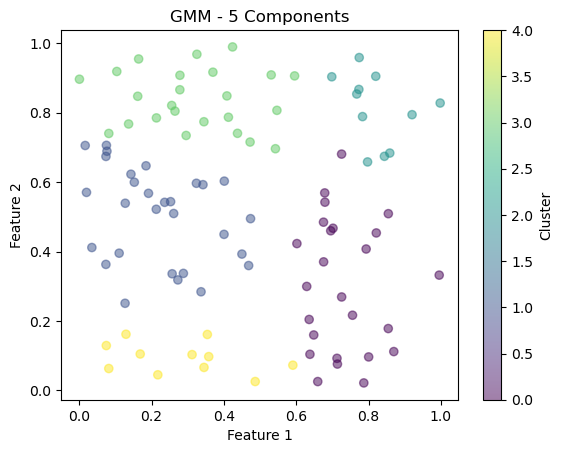

C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


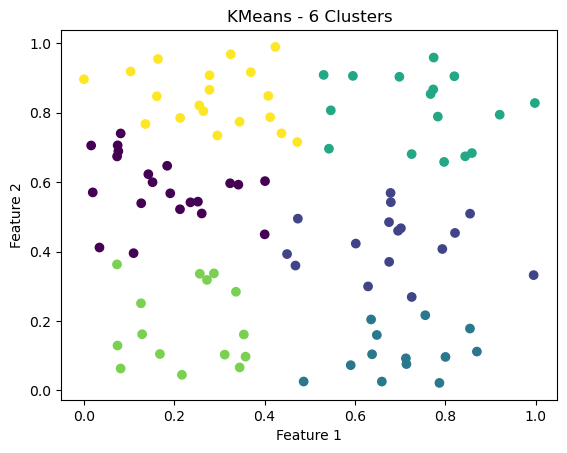

C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


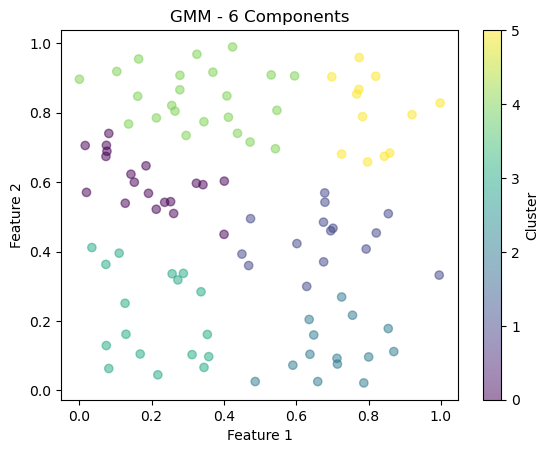

   KMeans (BIC)  KMeans (Silhueta)   GMM (BIC)  GMM (Silhueta)
4      3.628519           0.426696  108.026286        0.403772
5      2.924971           0.434232  126.554434        0.356489
6      2.286136           0.399087  145.881183        0.396401


In [7]:
# Função para calcular o BIC e a silhueta para KMeans
def kmeans_evaluation(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    kmeans.fit(data)
    bic_score = kmeans.inertia_
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    return bic_score, silhouette_avg

# Função para calcular o BIC e a silhueta para GMM
def gmm_evaluation(data, n_components):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(data)
    bic_score = gmm.bic(data)
    silhouette_avg = silhouette_score(data, gmm.predict(data))
    return bic_score, silhouette_avg

# Dados reduzidos
dados_reduced = np.random.rand(100, 2)

# Números de clusters para avaliação
clusters = [4, 5, 6]

# Dicionário para armazenar os resultados
results = {'KMeans (BIC)': [], 'KMeans (Silhueta)': [],
           'GMM (BIC)': [], 'GMM (Silhueta)': []}

# Loop para avaliar diferentes números de clusters
for n in clusters:
    # Avaliação do KMeans
    kmeans_bic, kmeans_silhouette = kmeans_evaluation(dados_reduced, n)
    results['KMeans (BIC)'].append(kmeans_bic)
    results['KMeans (Silhueta)'].append(kmeans_silhouette)
    
    # Avaliação do GMM
    gmm_bic, gmm_silhouette = gmm_evaluation(dados_reduced, n)
    results['GMM (BIC)'].append(gmm_bic)
    results['GMM (Silhueta)'].append(gmm_silhouette)

# Criando o DataFrame
df_results = pd.DataFrame(results, index=clusters)

# Plotando os gráficos de dispersão
for n in clusters:
    # KMeans
    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto")
    kmeans.fit(dados_reduced)
    cluster_de_cada_instancia_kmeans = kmeans.labels_
    
    plt.figure()
    plt.scatter(dados_reduced[:, 0], dados_reduced[:, 1], c=cluster_de_cada_instancia_kmeans)
    plt.title(f'KMeans - {n} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # GMM
    gmm = GaussianMixture(n_components=n)
    gmm.fit(dados_reduced)
    clusters_gmm = gmm.predict(dados_reduced)

    plt.figure()
    plt.scatter(dados_reduced[:, 0], dados_reduced[:, 1], c=clusters_gmm, cmap='viridis', alpha=0.5)
    plt.title(f'GMM - {n} Components')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Mostrando o DataFrame
print(df_results)


# Aplicação da semantica na análise de clustering 


## Observação do mapa de calor 

Text(95.72222222222221, 0.5, 'Termos da Ontologia')

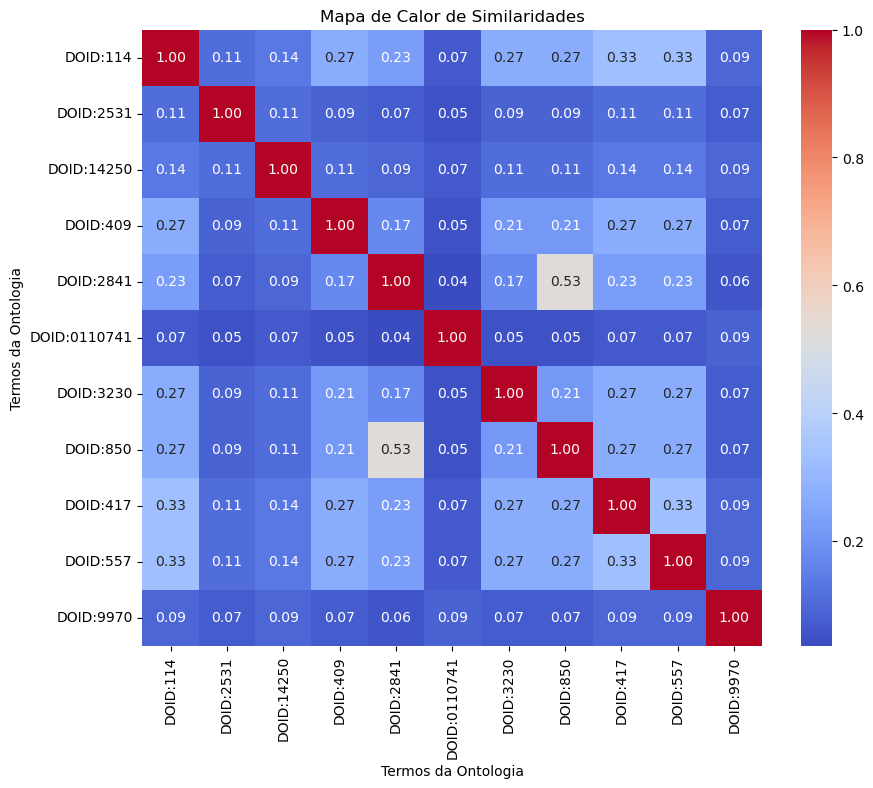

In [8]:
# Matriz de similaridades do arquivo CSV 

matriz_similaridades = pd.read_csv("matriz_similaridades.csv", index_col=0) 

# Mapa de calor 

plt.figure(figsize=(10, 8)) 

sns.heatmap(matriz_similaridades, cmap="coolwarm", annot=True, fmt=".2f") 

plt.title("Mapa de Calor de Similaridades") 

plt.xlabel("Termos da Ontologia") 

plt.ylabel("Termos da Ontologia") 

## Modelo tradicional 

Criação do mapa de calor proviniente da Matriz de similaridades do R.

### Formação de dados_dose

In [9]:
# Dicionário para renomear as colunas
novo_nome_colunas = {
    'CARDIOPATI_m': 'DOID:114',
    'HEMATOLOGI_m': 'DOID:2531',
    'SIND_DOWN_m': 'DOID:14250',
    'HEPATICA_m': 'DOID:409',
    'ASMA_m': 'DOID:2841',
    'DIABETES_m': 'DOID:0110741',
    'NEUROLOGIC_m': 'DOID:3230',
    'PNEUMOPATI_m': 'DOID:850',
    'IMUNODEPRE_m': 'DOID:417',
    'RENAL_m': 'DOID:557',
    'OBESIDADE_m': 'DOID:9970'
}

dados_dose = dados.rename(columns=novo_nome_colunas)
print(dados_dose)

         CS_SEXO  NU_IDADE_N  DOID:114  DOID:2531  DOID:14250  DOID:409  \
0              1    0.373737         0          0           0         0   
1              0    0.414141         0          0           0         0   
2              0    0.727273         1          0           0         0   
3              1    0.404040         0          0           0         0   
4              0    0.343434         1          0           0         0   
...          ...         ...       ...        ...         ...       ...   
1671974        1    0.484848         1          0           0         0   
1671975        1    0.474747         1          0           0         0   
1671976        0    0.434343         0          0           0         0   
1671977        1    0.131313         0          0           0         0   
1671978        1    0.454545         1          0           0         0   

         DOID:2841  DOID:0110741  DOID:3230  DOID:850  ...  IS_CAPITAL  UTI  \
0                0  

In [10]:
dados_dose.columns

Index(['CS_SEXO', 'NU_IDADE_N', 'DOID:114', 'DOID:2531', 'DOID:14250',
       'DOID:409', 'DOID:2841', 'DOID:0110741', 'DOID:3230', 'DOID:850',
       'DOID:417', 'DOID:557', 'DOID:9970', 'IS_CAPITAL', 'UTI', 'IS_DEATH',
       'White', 'Black/Brown', 'Asian', 'Indigenous', 'IDH_MUM_RES',
       'IDH_MU_INTE', 'mesmo_mun'],
      dtype='object')

In [11]:
# Lista das colunas que serão mantidas
colunas_utilizadas = ['DOID:114', 'DOID:2531', 'DOID:14250',
       'DOID:409', 'DOID:2841', 'DOID:0110741', 'DOID:3230', 'DOID:850',
       'DOID:417', 'DOID:557', 'DOID:9970']

dados_dose = dados_dose[colunas_utilizadas]

print(dados_dose)

         DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
0               0          0           0         0          0             0   
1               0          0           0         0          0             0   
2               1          0           0         0          0             0   
3               0          0           0         0          0             1   
4               1          0           0         0          0             0   
...           ...        ...         ...       ...        ...           ...   
1671974         1          0           0         0          0             0   
1671975         1          0           0         0          0             1   
1671976         0          0           0         0          0             0   
1671977         0          0           0         0          0             0   
1671978         1          0           0         0          0             0   

         DOID:3230  DOID:850  DOID:417  DOID:557  D

### Formação do dados_dose_final 

In [12]:

# Função para renomear as linhas
def renomear_linhas(row):
    doencas_presentes = [coluna for coluna, valor in row.items() if valor == 1]
    if len(doencas_presentes) == 0:
        return str(row.name)  # Retorna o índice original se o paciente não tiver nenhuma doença
    doencas_presentes.sort()
    return ','.join(doencas_presentes)

# Renomeando as linhas
dados_dose_resultado = dados_dose.apply(renomear_linhas, axis=1)

# Criando um novo dataframe com as linhas renomeadas
dados_dose_final = dados_dose.copy()
dados_dose_final.index = dados_dose_resultado

# Exibindo o DataFrame final
print(dados_dose_final)


                                DOID:114  DOID:2531  DOID:14250  DOID:409  \
0                                      0          0           0         0   
1                                      0          0           0         0   
DOID:114,DOID:3230                     1          0           0         0   
DOID:0110741                           0          0           0         0   
DOID:114,DOID:9970                     1          0           0         0   
...                                  ...        ...         ...       ...   
DOID:114                               1          0           0         0   
DOID:0110741,DOID:114,DOID:557         1          0           0         0   
1671976                                0          0           0         0   
1671977                                0          0           0         0   
DOID:114                               1          0           0         0   

                                DOID:2841  DOID:0110741  DOID:3230  DOID:85

In [13]:
dados_dose_final.head(15)     

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,DOID:9970
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
"DOID:114,DOID:3230",1,0,0,0,0,0,1,0,0,0,0
DOID:0110741,0,0,0,0,0,1,0,0,0,0,0
"DOID:114,DOID:9970",1,0,0,0,0,0,0,0,0,0,1
"DOID:0110741,DOID:114",1,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
"DOID:0110741,DOID:114",1,0,0,0,0,1,0,0,0,0,0
DOID:114,1,0,0,0,0,0,0,0,0,0,0


### Formação do df_similaridades 

In [14]:

# Conjunto para armazenar os índices que não são apenas números
indices_nao_numericos = set()

# Iterar sobre o índice de dados_dose_final
for index in dados_dose_final.index:
    # Verificar se o índice não é um número
    if not index.isnumeric():
        # Adicionar o índice ao conjunto indices_nao_numericos
        indices_nao_numericos.add(index)

# Criar um DataFrame a partir do conjunto de índices
df_indices_dose = pd.DataFrame(list(indices_nao_numericos), columns=['Index'])

# Salvar o DataFrame em um arquivo CSV
#df_indices_dose.to_csv('indices_dose.csv', index=False)



In [15]:
df_indices_dose

,Index
0,"DOID:2841,DOID:3230,DOID:850"
1,"DOID:0110741,DOID:2841,DOID:409,DOID:9970"
2,"DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DO..."
3,"DOID:114,DOID:850"
4,"DOID:0110741,DOID:114,DOID:2531,DOID:2841,DOID..."
...,...
947,"DOID:0110741,DOID:3230,DOID:417"
948,"DOID:409,DOID:417,DOID:557,DOID:9970"
949,"DOID:0110741,DOID:114,DOID:557"
950,"DOID:0110741,DOID:114,DOID:2841,DOID:557,DOID:..."


In [16]:
# Carregar o arquivo CSV em um DataFrame
df_similaridades = pd.read_csv('similaridades.csv', index_col=0)

# Exibir o DataFrame
df_similaridades 

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,DOID:9970
1,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
2,0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,0.093360
3,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
4,1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
5,0.109892,1.000000,0.109892,0.086582,0.071430,0.049858,0.086582,0.086582,0.109892,0.109892,0.071430
...,...,...,...,...,...,...,...,...,...,...,...
948,1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
949,1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
950,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
951,1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360


In [17]:

# Extrair os códigos DOID de df_indices_dose
codigos_doid = df_indices_dose['Index'].str.split(',').apply(lambda x: ','.join(sorted(x))).tolist()

# Substituir os índices numéricos de df_similaridades pelos códigos DOID correspondentes
df_similaridades.index = codigos_doid

# Exibir o DataFrame df_similaridades com os códigos DOID como índices
print(df_similaridades)



                                                    DOID:114  DOID:2531  \
DOID:2841,DOID:3230,DOID:850                        0.069899   0.049858   
DOID:0110741,DOID:2841,DOID:409,DOID:9970           0.135413   0.109892   
DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOI...  0.069899   0.049858   
DOID:114,DOID:850                                   1.000000   0.109892   
DOID:0110741,DOID:114,DOID:2531,DOID:2841,DOID:...  0.109892   1.000000   
...                                                      ...        ...   
DOID:0110741,DOID:3230,DOID:417                     1.000000   0.109892   
DOID:409,DOID:417,DOID:557,DOID:9970                1.000000   0.109892   
DOID:0110741,DOID:114,DOID:557                      0.069899   0.049858   
DOID:0110741,DOID:114,DOID:2841,DOID:557,DOID:9970  1.000000   0.109892   
DOID:0110741,DOID:114,DOID:3230,DOID:409            0.226732   0.071430   

                                                    DOID:14250  DOID:409  \
DOID:2841,DOID:3230,DOI

In [18]:
df_similaridades.head(10) 

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,DOID:9970
"DOID:2841,DOID:3230,DOID:850",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:0110741,DOID:2841,DOID:409,DOID:9970",0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,0.093360
"DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOID:850",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:114,DOID:850",1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
"DOID:0110741,DOID:114,DOID:2531,DOID:2841,DOID:3230,DOID:409,DOID:850,DOID:9970",0.109892,1.000000,0.109892,0.086582,0.071430,0.049858,0.086582,0.086582,0.109892,0.109892,0.071430
"DOID:417,DOID:557,DOID:850",0.109892,1.000000,0.109892,0.086582,0.071430,0.049858,0.086582,0.086582,0.109892,0.109892,0.071430
"DOID:0110741,DOID:14250,DOID:2841,DOID:557,DOID:9970",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:2531,DOID:3230,DOID:417",1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
"DOID:2841,DOID:417,DOID:557,DOID:850",0.328859,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,1.000000,0.328859,0.093360
"DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:417",0.226732,0.071430,0.093360,0.173473,1.000000,0.036762,0.173473,0.527499,0.226732,0.226732,0.057144


### Formação do dados_dose_definitivo 


## Teste final


In [19]:
# Copiar o DataFrame dados_dose_final para dados_dose_definitivo
dados_dose_definitivo = dados_dose_final.copy()

# Encontrar as linhas não numéricas em dados_dose_definitivo que têm correspondência no índice de df_similaridades
linhas_nao_numericas = dados_dose_definitivo.index[~dados_dose_definitivo.index.str.isnumeric()]

# Selecionar apenas os índices presentes em ambas as séries
indices_nao_numericos = linhas_nao_numericas.intersection(df_similaridades.index)

# Substituir os valores das linhas não numéricas em dados_dose_definitivo pelos valores correspondentes em df_similaridades
dados_dose_definitivo.update(df_similaridades.loc[indices_nao_numericos])

# Exibir o DataFrame dados_dose_definitivo após a substituição
print(dados_dose_definitivo)


                                DOID:114  DOID:2531  DOID:14250  DOID:409  \
0                               0.000000   0.000000    0.000000  0.000000   
1                               0.000000   0.000000    0.000000  0.000000   
DOID:114,DOID:3230              1.000000   0.109892    0.135413  0.266882   
DOID:0110741                    0.069899   0.049858    0.069899  0.049858   
DOID:114,DOID:9970              0.135413   0.109892    1.000000  0.109892   
...                                  ...        ...         ...       ...   
DOID:114                        0.069899   0.049858    0.069899  0.049858   
DOID:0110741,DOID:114,DOID:557  0.069899   0.049858    0.069899  0.049858   
1671976                         0.000000   0.000000    0.000000  0.000000   
1671977                         0.000000   0.000000    0.000000  0.000000   
DOID:114                        0.069899   0.049858    0.069899  0.049858   

                                DOID:2841  DOID:0110741  DOID:3230  DOID:85

In [20]:
dados_dose_definitivo.head(10) 

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,DOID:9970
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"DOID:114,DOID:3230",1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
DOID:0110741,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:114,DOID:9970",0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,0.093360
"DOID:0110741,DOID:114",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"DOID:0110741,DOID:114",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
DOID:114,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279


# Aplicação da Ontologia nos dados de análise 

#### Colunas de análise:

'CARDIOPATI_m', 'HEMATOLOGI_m', 'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m', 'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m''IS_CAPITAL', 'UTI',
       'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun'

## Análise de dados

In [21]:
# Importação dos dados
srag_tratado = pd.read_csv("srag_tratada.csv", low_memory = False)
dados_01 = srag_tratado.copy().drop("ID", axis = 1)
print("Visualizando os primeiros registros dos dados:")
print(dados_01.head()) 

Visualizando os primeiros registros dos dados:
   CS_SEXO  NU_IDADE_N  CARDIOPATI_m  HEMATOLOGI_m  SIND_DOWN_m  HEPATICA_m  \
0        1    0.373737             0             0            0           0   
1        0    0.414141             0             0            0           0   
2        0    0.727273             1             0            0           0   
3        1    0.404040             0             0            0           0   
4        0    0.343434             1             0            0           0   

   ASMA_m  DIABETES_m  NEUROLOGIC_m  PNEUMOPATI_m  ...  IS_CAPITAL  UTI  \
0       0           0             0             0  ...           1    0   
1       0           0             0             0  ...           1    0   
2       0           0             1             0  ...           1    0   
3       0           1             0             0  ...           1    1   
4       0           0             0             0  ...           1    1   

   IS_DEATH  White  Black/B

In [22]:
dados_dose_definitivo.head(10) 

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,DOID:9970
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"DOID:114,DOID:3230",1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
DOID:0110741,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:114,DOID:9970",0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,0.093360
"DOID:0110741,DOID:114",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"DOID:0110741,DOID:114",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
DOID:114,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279


In [23]:
dados_dose_definitivo


,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,DOID:9970
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"DOID:114,DOID:3230",1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,0.093360
DOID:0110741,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:114,DOID:9970",0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,0.093360
...,...,...,...,...,...,...,...,...,...,...,...
DOID:114,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
"DOID:0110741,DOID:114,DOID:557",0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,0.089279
1671976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1671977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


'ID', 'CS_SEXO', 'NU_IDADE_N', 'CARDIOPATI_m', 'HEMATOLOGI_m',
       'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m',
       'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m', 'IS_CAPITAL',
       'UTI', 'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun']  
       

In [24]:
# Selecionar apenas as colunas desejadas do DataFrame 'dados'
dados_selecionados = dados[['CS_SEXO', 'NU_IDADE_N','IS_CAPITAL', 'UTI', 'White', 'Black/Brown', 'Asian', 'Indigenous', 'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun']]

# Concatenar os DataFrames 'dados_dose_definitivo' e 'dados_selecionados' ao longo das colunas (axis=1)
dados_dose_definitivo_01 = pd.concat([dados_dose_definitivo.reset_index(drop = True), dados_selecionados.reset_index(drop = True)],axis=1) 

# Exibir o DataFrame resultante
dados_dose_definitivo_01

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,...,NU_IDADE_N,IS_CAPITAL,UTI,White,Black/Brown,Asian,Indigenous,IDH_MUM_RES,IDH_MU_INTE,mesmo_mun
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.373737,1,0,0,0,0,0,0.871622,0.871622,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.414141,1,0,0,0,0,0,0.871622,0.871622,1
2,1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,...,0.727273,1,0,1,0,0,0,0.871622,0.871622,1
3,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.404040,1,1,1,0,0,0,0.871622,0.871622,1
4,0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,...,0.343434,1,1,1,0,0,0,0.871622,0.871622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671974,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.484848,1,1,0,0,0,0,0.871622,0.871622,1
1671975,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.474747,1,0,1,0,0,0,0.871622,0.871622,1
1671976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.434343,0,0,1,0,0,0,0.871622,0.779259,0
1671977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.131313,0,0,1,0,0,0,0.639640,0.810811,0


In [25]:
dados_dose_definitivo_01.head(10) 

,DOID:114,DOID:2531,DOID:14250,DOID:409,DOID:2841,DOID:0110741,DOID:3230,DOID:850,DOID:417,DOID:557,...,NU_IDADE_N,IS_CAPITAL,UTI,White,Black/Brown,Asian,Indigenous,IDH_MUM_RES,IDH_MU_INTE,mesmo_mun
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.373737,1,0,0,0,0,0,0.871622,0.871622,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.414141,1,0,0,0,0,0,0.871622,0.871622,1
2,1.000000,0.109892,0.135413,0.266882,0.226732,0.069899,0.266882,0.266882,0.328859,0.328859,...,0.727273,1,0,1,0,0,0,0.871622,0.871622,1
3,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.404040,1,1,1,0,0,0,0.871622,0.871622,1
4,0.135413,0.109892,1.000000,0.109892,0.093360,0.069899,0.109892,0.109892,0.135413,0.135413,...,0.343434,1,1,1,0,0,0,0.871622,0.871622,1
5,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.484848,1,0,1,0,0,0,0.871622,0.871622,1
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.474747,1,1,0,0,0,0,0.828829,0.871622,0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.525253,1,0,0,1,0,0,0.871622,0.871622,1
8,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.474747,1,1,0,0,0,0,0.871622,0.871622,1
9,0.069899,0.049858,0.069899,0.049858,0.036762,1.000000,0.049858,0.049858,0.069899,0.069899,...,0.474747,0,1,1,0,0,0,0.795045,0.795045,1


# PCA (Caso mais avançado) 

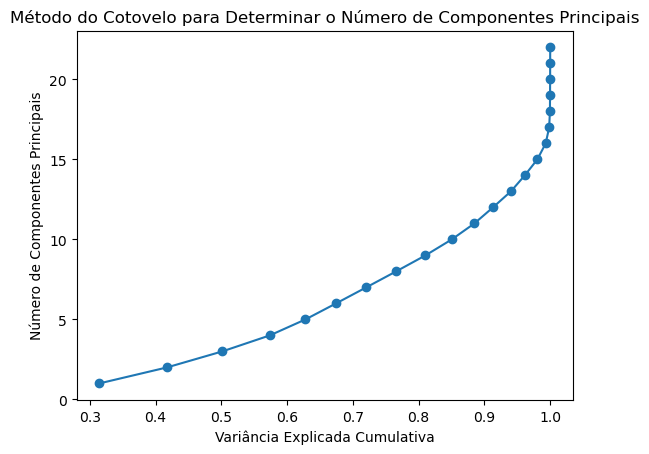

In [26]:
# Normalizando os dados (opcional, mas geralmente uma boa prática)
dados_norm = (dados_dose_definitivo_01 - dados_dose_definitivo_01.mean()) / dados_dose_definitivo_01.std()

# Inicializando o objeto PCA sem especificar o número de componentes principais
pca = PCA()

# Aplicando a transformação PCA aos dados normalizados
pca.fit(dados_norm)

# Calcular a variância explicada cumulativa
var_exp_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância explicada cumulativa em relação ao número de componentes, invertendo os eixos
plt.plot(var_exp_cumulative, range(1, len(var_exp_cumulative) + 1), marker='o')
plt.ylabel('Número de Componentes Principais')
plt.xlabel('Variância Explicada Cumulativa')
plt.title('Método do Cotovelo para Determinar o Número de Componentes Principais')
plt.show()


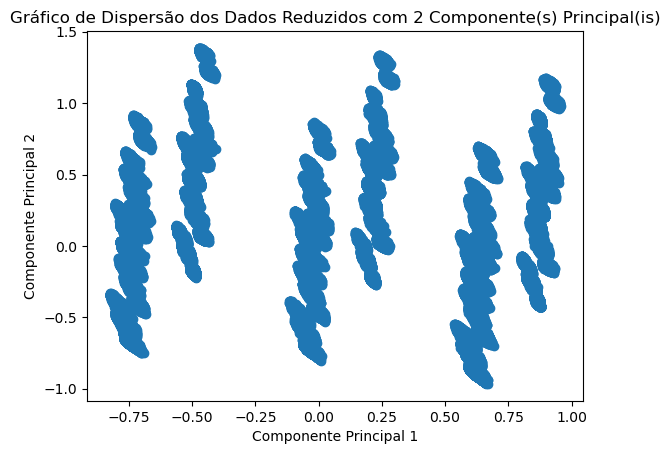

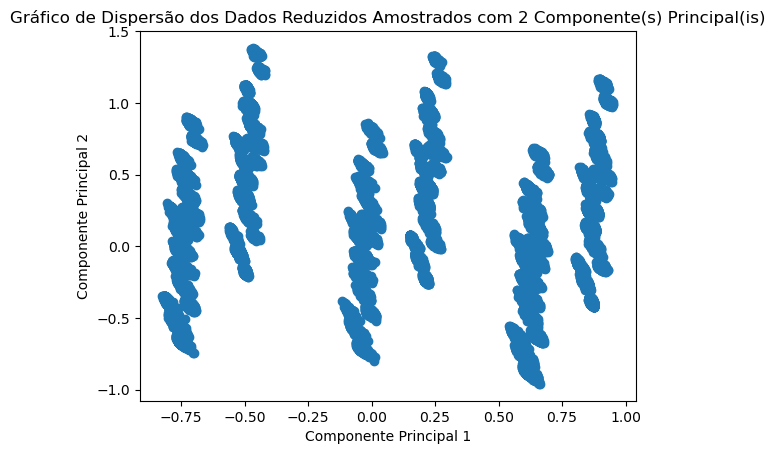

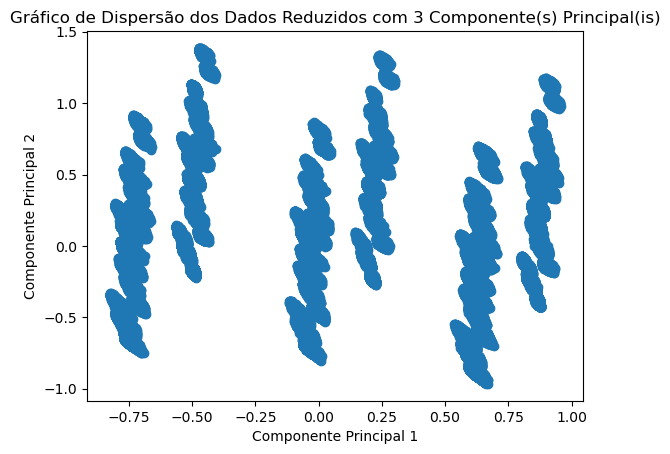

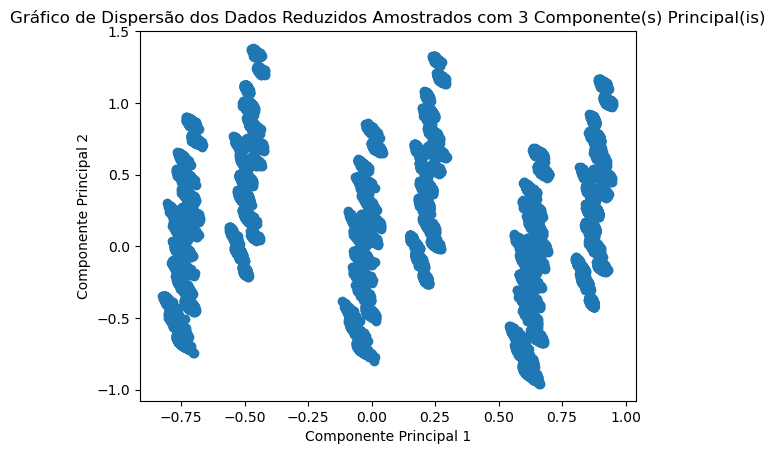

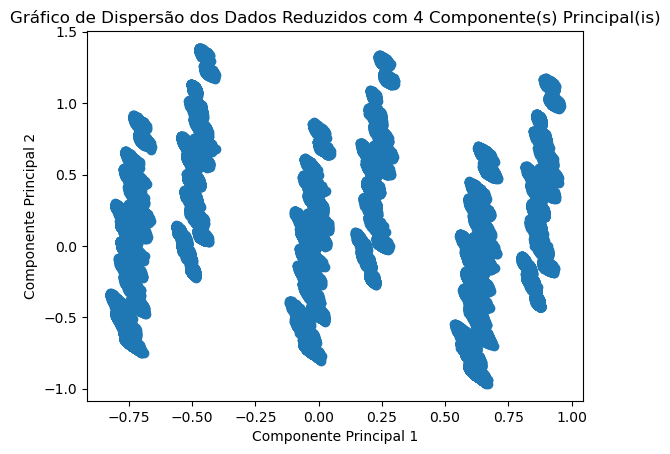

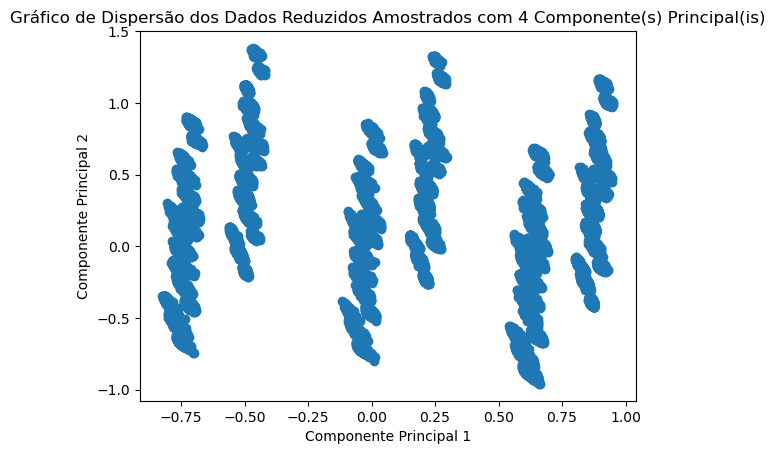

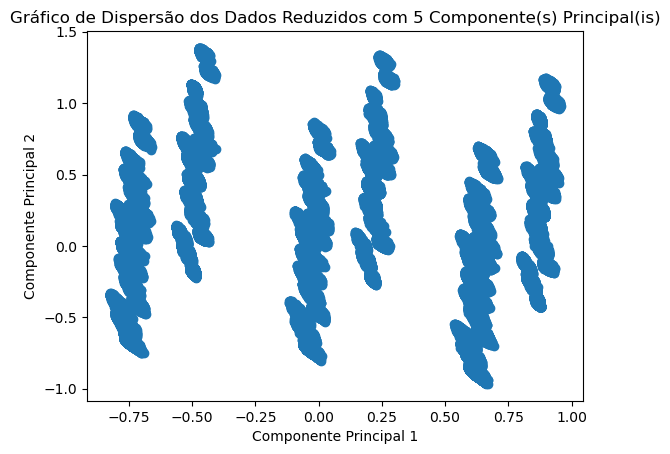

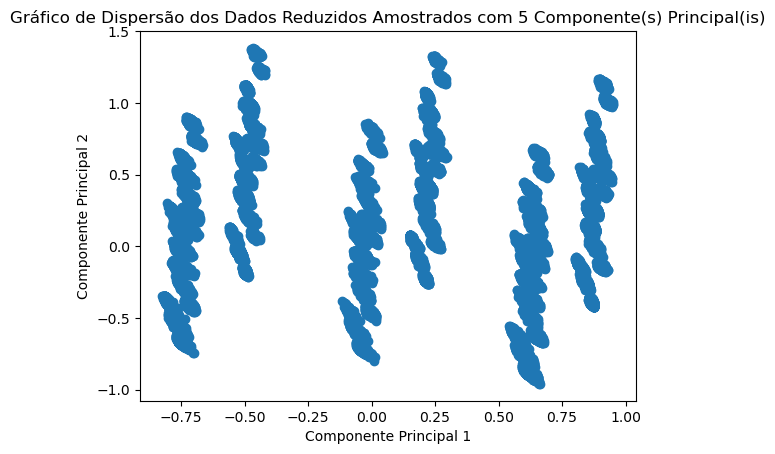

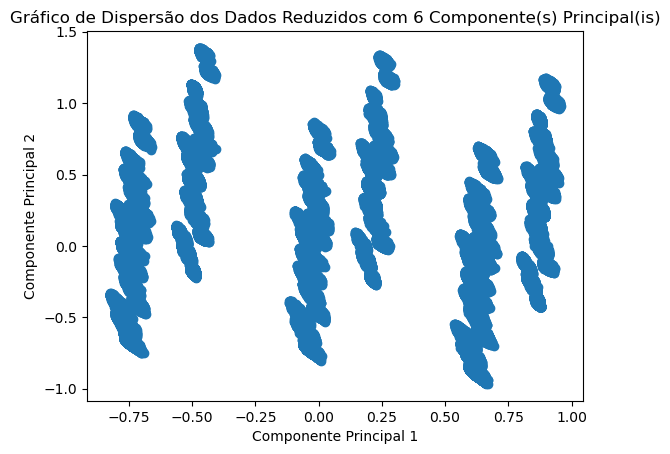

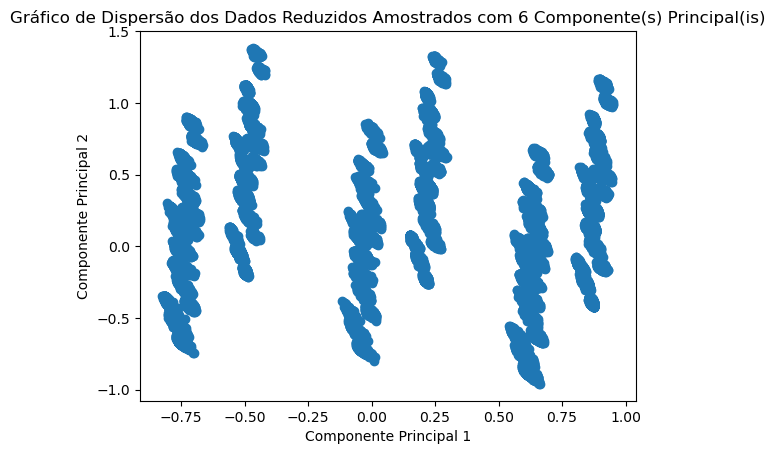

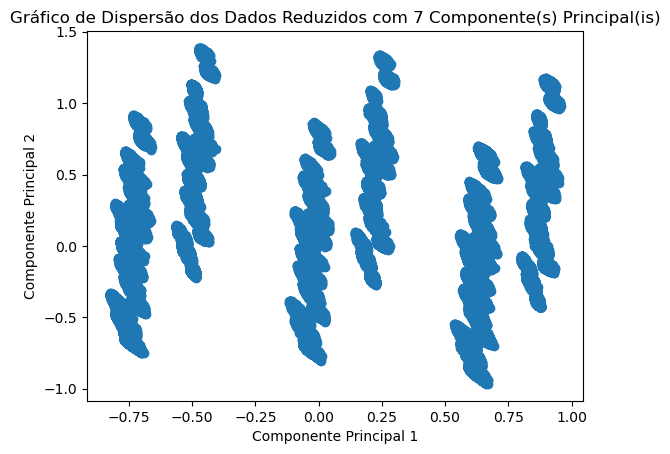

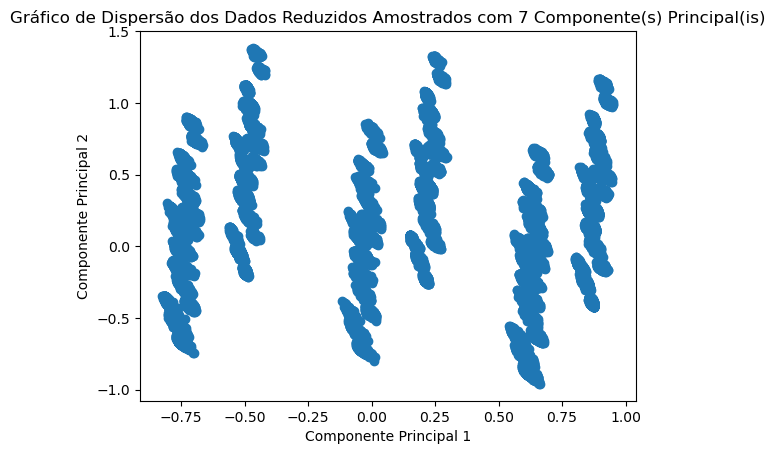

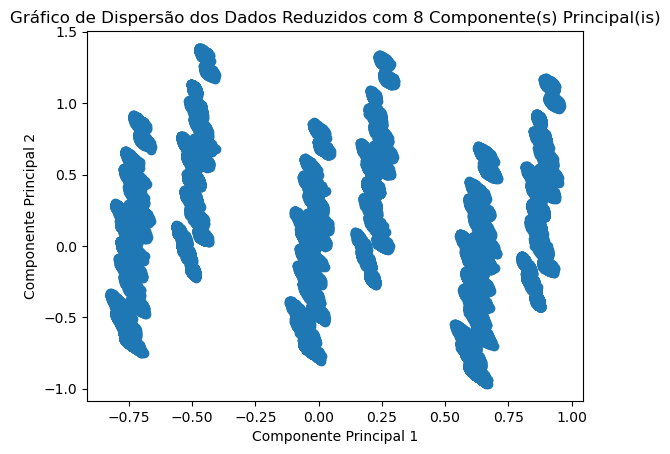

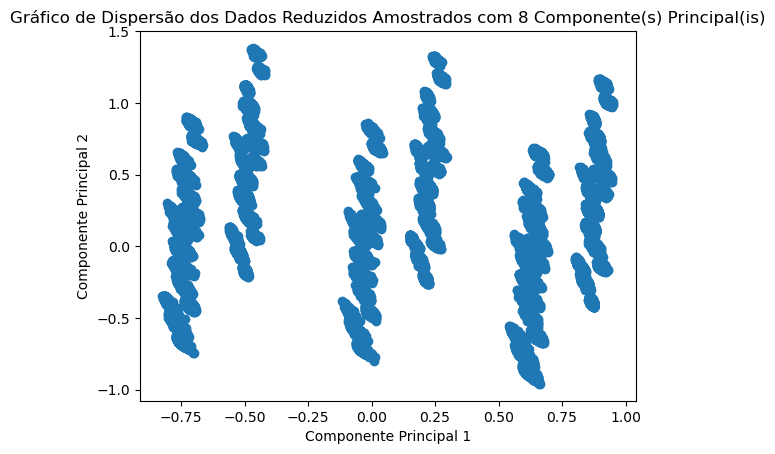

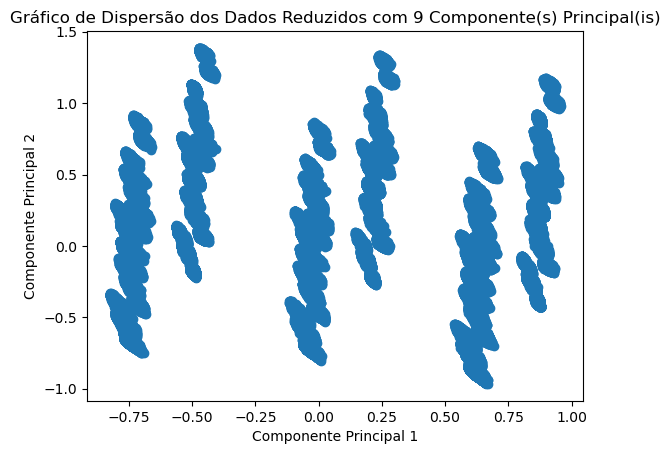

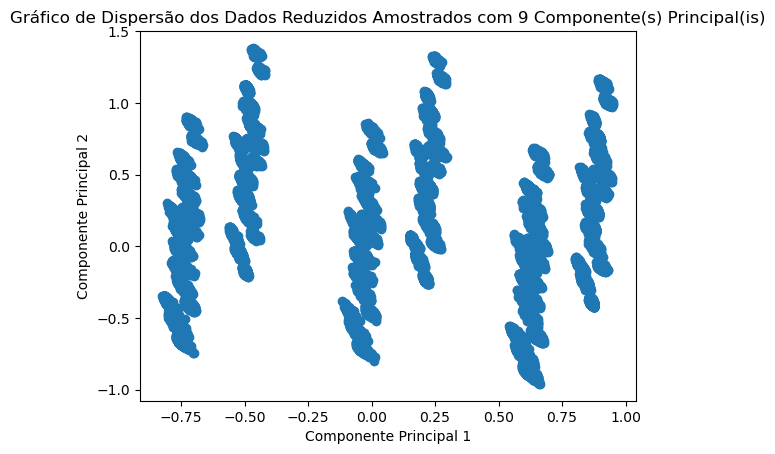

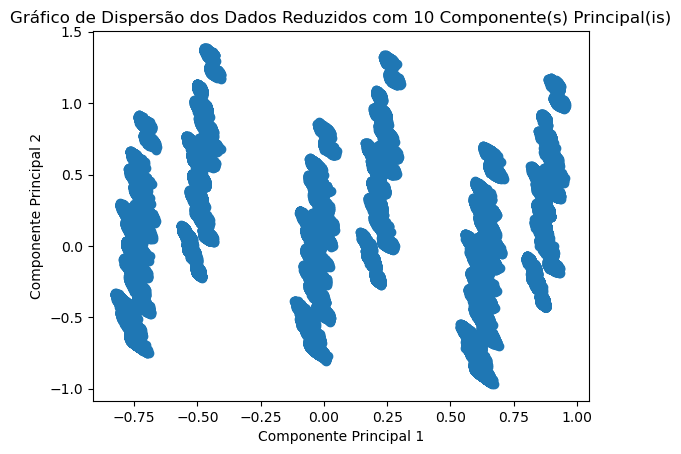

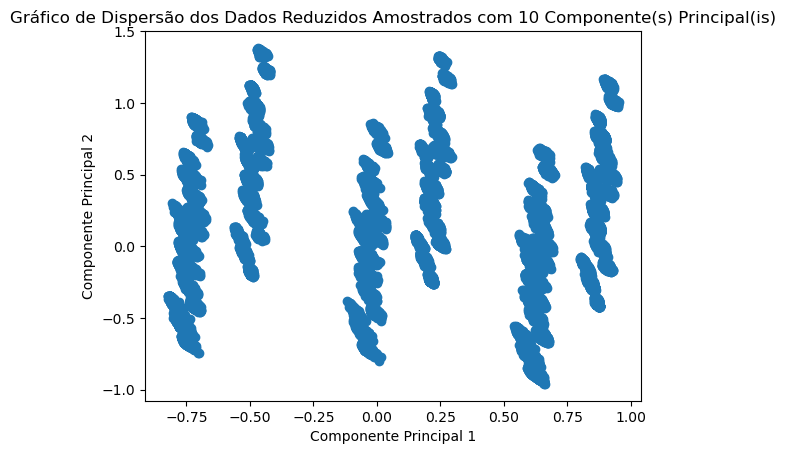

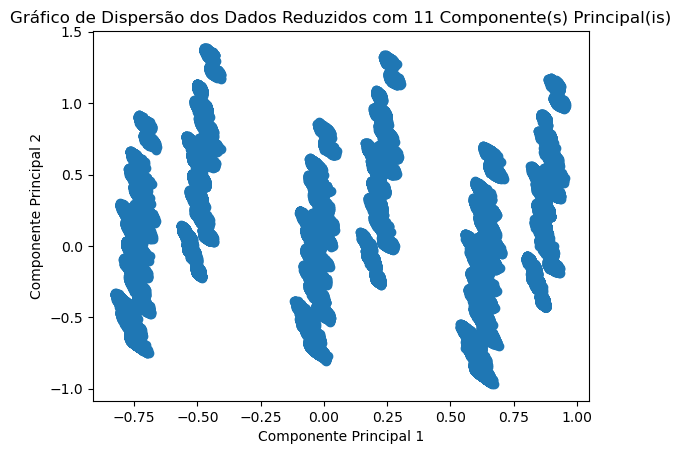

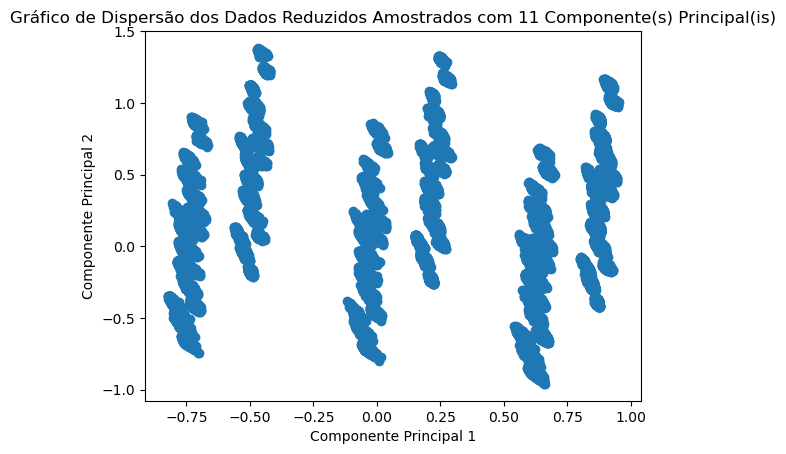

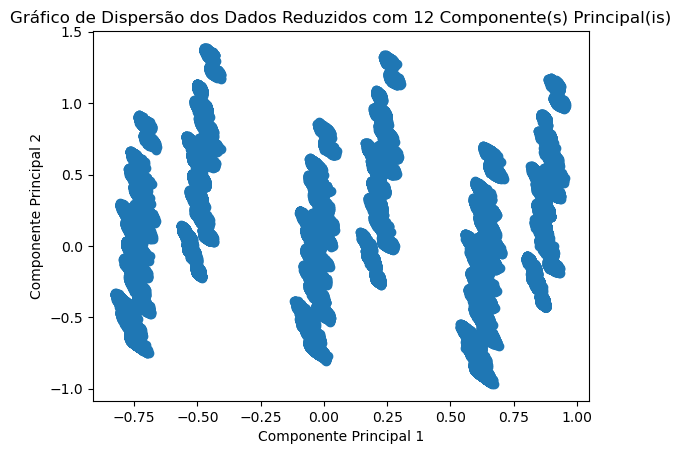

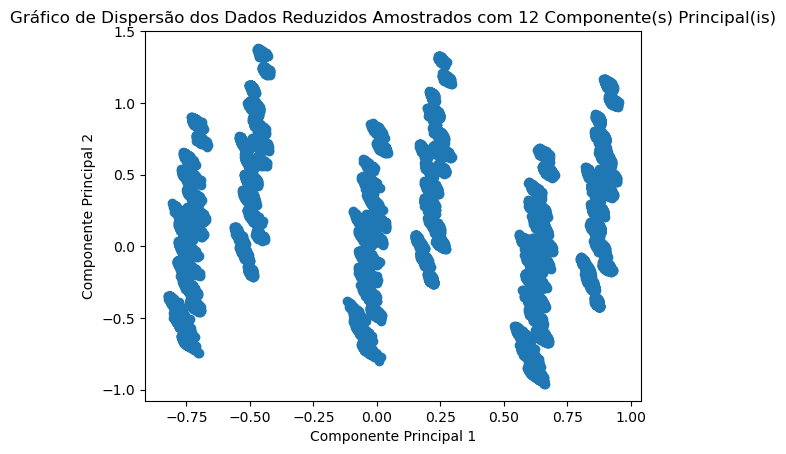

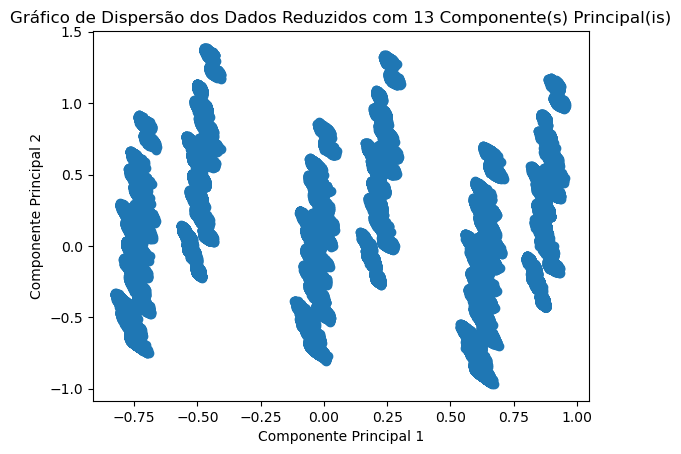

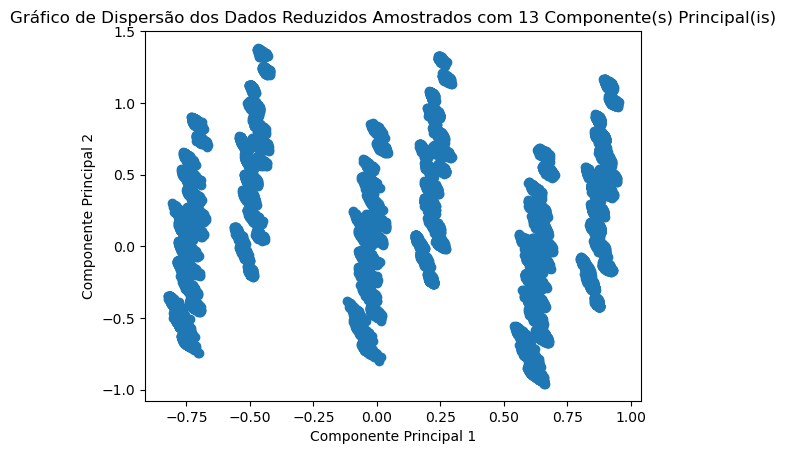

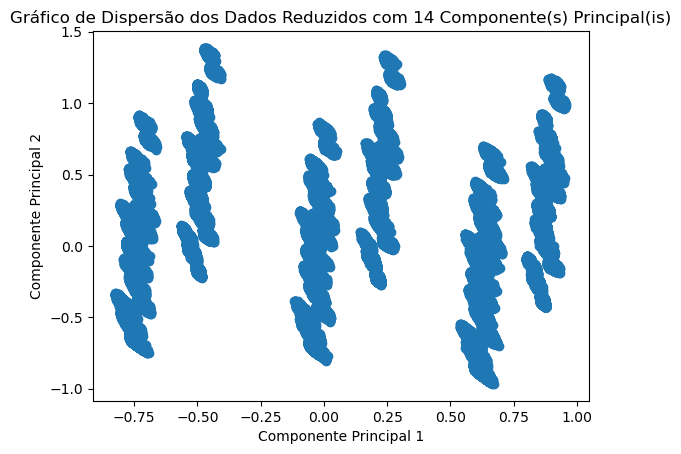

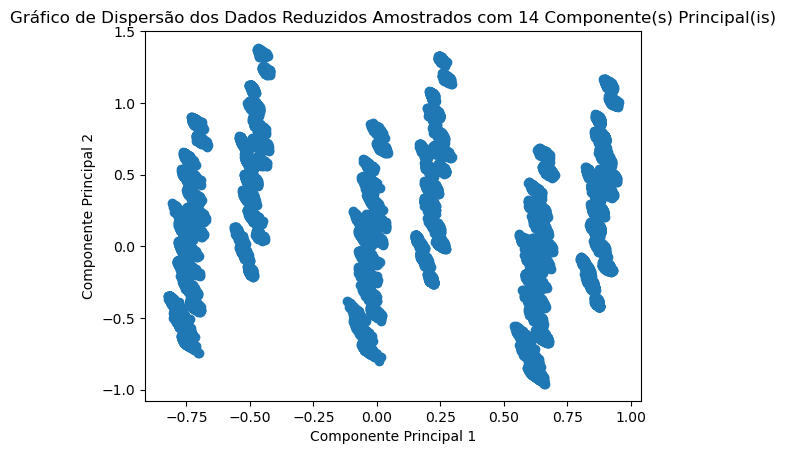

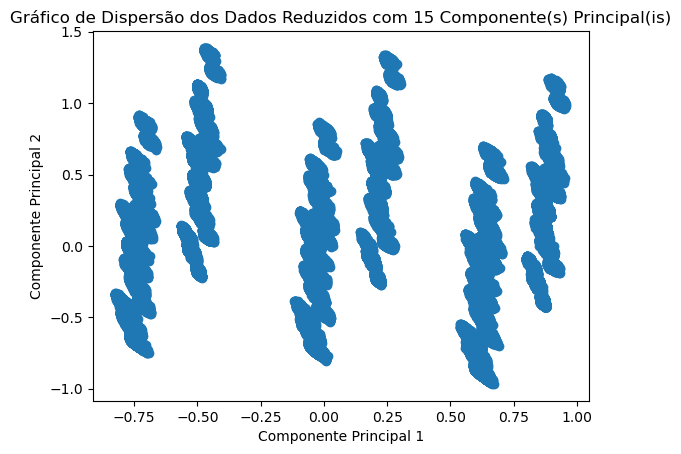

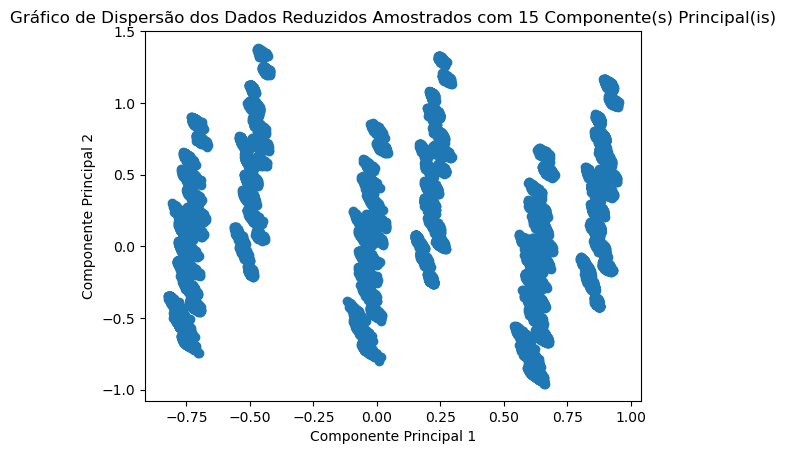

In [27]:
lista = list(range(2, 16))
dados_reduced_dict = {}
for n in lista:
    # Inicializando o objeto PCA com o número de componentes principais desejados
    pca = PCA(n_components=n)

    # Aplicando a transformação PCA aos dados e armazenando o resultado em um DataFrame chamado dados_reduced_02
    dados_reduced_02 = pd.DataFrame(pca.fit_transform(dados_dose_definitivo_01))
     
    # Armazenando os dados reduzidos no dicionário, onde a chave é o valor de n e o valor correspondente é o DataFrame
    dados_reduced_dict[n] = dados_reduced_02
    
    # Plotando um gráfico de dispersão dos dados reduzidos (apenas duas dimensões)
    plt.scatter(dados_reduced_02.iloc[:,0], dados_reduced_02.iloc[:,1])

    # Nomeando os eixos
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Gráfico de Dispersão dos Dados Reduzidos com {} Componente(s) Principal(is)'.format(n))

    # Mostrando o gráfico
    plt.show()

    # Amostrando os dados reduzidos para 75000 instâncias, garantindo que a amostra seja a mesma para diferentes execuções (random_state=42)
    dados_reduced_02_sample = dados_reduced_02.sample(75000, random_state=42)

    # Plotando um gráfico de dispersão dos dados reduzidos amostrados
    plt.scatter(dados_reduced_02_sample.iloc[:,0], dados_reduced_02_sample.iloc[:,1])

    # Nomeando os eixos
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Gráfico de Dispersão dos Dados Reduzidos Amostrados com {} Componente(s) Principal(is)'.format(n))

    # Mostrando o gráfico
    plt.show()



# Formação de Clustering 

KMeans

Gaussian Mixture Models (GMM)

Índice de Silhueta 

BIC

DBI

In [35]:
data = dados_reduced_dict[2] 

In [36]:
def evaluate_clustering_methods(data):
    seed_random = 75000
    # Lista para armazenar os resultados
    results = []
    cluster_dict_kmeans = {}
    cluster_dict_gmm = {}
    
    # Loop para testar diferentes números de clusters
    for n_clusters in range(2, 5):
        # Avaliação do KMeans
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=seed_random)
        kmeans.fit(data)
        kmeans_bic = kmeans.inertia_
        kmeans_silhouette = silhouette_score(data, kmeans.labels_)
        kmeans_dbi = davies_bouldin_score(data, kmeans.labels_)
        
        # Salvando resultados para KMeans
        cluster_dict_kmeans[n_clusters] = kmeans.labels_

        # Avaliação do GMM
        gmm = GaussianMixture(n_components=n_clusters, random_state=seed_random)
        gmm.fit(data)
        gmm_bic = gmm.bic(data)
        gmm_silhouette = silhouette_score(data, gmm.predict(data))
        gmm_dbi = davies_bouldin_score(data, gmm.predict(data))
        
        # Salvando resultados para GMM
        cluster_dict_gmm[n_clusters] = gmm.predict(data)

        # Adicionando resultados à lista
        results.append({
            'Número de Clusters': n_clusters,
            'KMeans (BIC)': kmeans_bic,
            'KMeans (Silhueta)': kmeans_silhouette,
            'KMeans (DBI)': kmeans_dbi,
            'GMM (BIC)': gmm_bic,
            'GMM (Silhueta)': gmm_silhouette,
            'GMM (DBI)': gmm_dbi
        })

    # Criando DataFrame com os resultados
    df_results = pd.DataFrame(results)

    return df_results


In [ ]:
evaluate_clustering_methods(data) 

## Confecção dos gráficos de Clustering 

In [ ]:
def plot_kmeans_scatter(data, cluster_labels, n_clusters):
    plt.figure()
    plt.scatter(data[0], data[1], c=cluster_labels)
    plt.title(f'KMeans - {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_gmm_scatter(data, cluster_predictions, n_components):
    plt.figure()
    plt.scatter(data[0], data[1], c=cluster_predictions, cmap='viridis', alpha=0.5)
    plt.title(f'GMM - {n_components} Components')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()


In [ ]:
# Plotando os clusters do KMeans
for n_clusters, cluster_labels in cluster_dict_kmeans.items():
    plot_kmeans_scatter(data, cluster_labels, n_clusters)

# Plotando os clusters do GMM
for n_components, cluster_predictions in cluster_dict_gmm.items():
    plot_gmm_scatter(data, cluster_predictions, n_components)
